<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Medical_Cost_Personal_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Medical Cost Personal Datasets
#Objective: Analyze factors affecting medical insurance costs.
#Source: https://www.kaggle.com/datasets/mirichoi0218/insurance

#Step 1: Setup and Data Preparation
#1. Load the Dataset
import pandas as pd

# Load the dataset
data = pd.read_csv("insurance.csv")

# Display first 5 rows
print(data.head())

# Display last 5 rows
print(data.tail())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [3]:
#2. Understand the Structure
# Check structure
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [4]:
#3. Handle Missing Values
# Fill missing values with mean (for numerical) or mode (for categorical)
data['age'] = data['age'].fillna(data['age'].mean())
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

In [5]:
#4. Remove Duplicates
data = data.drop_duplicates()

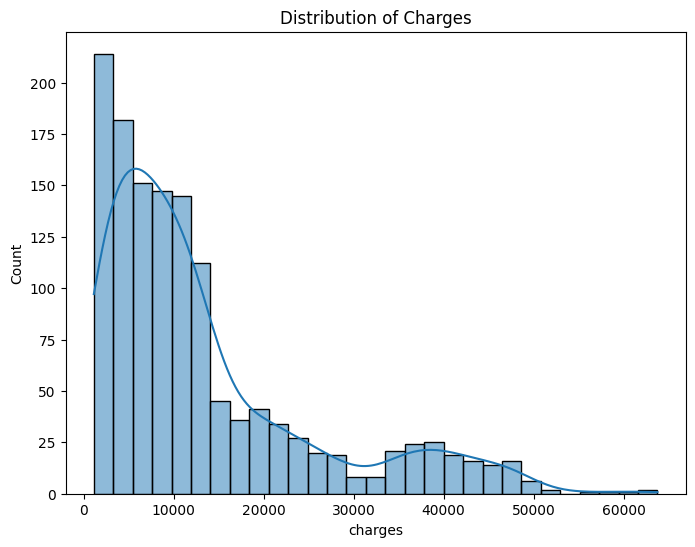

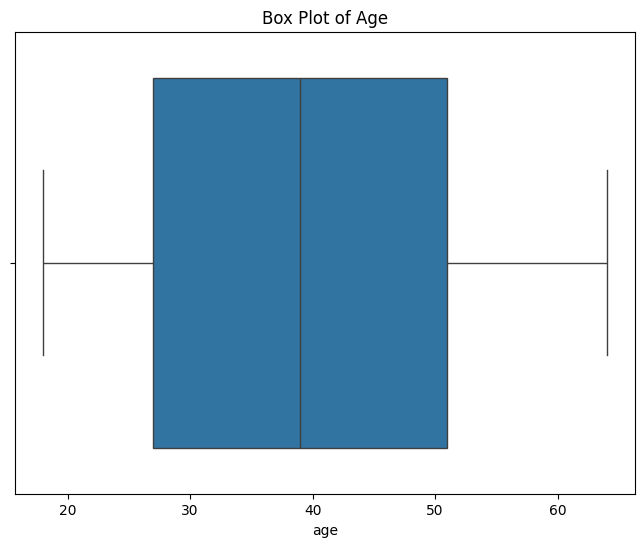

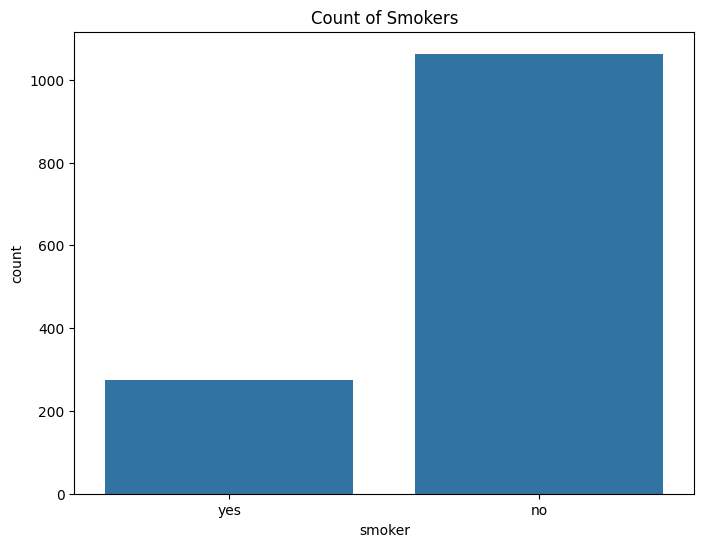

In [6]:
#Step 2: Exploratory Data Analysis
#1. Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'charges'
plt.figure(figsize=(8, 6))
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

# Box plot for 'age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['age'])
plt.title('Box Plot of Age')
plt.show()

# Bar plot for 'smoker'
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=data)
plt.title('Count of Smokers')
plt.show()

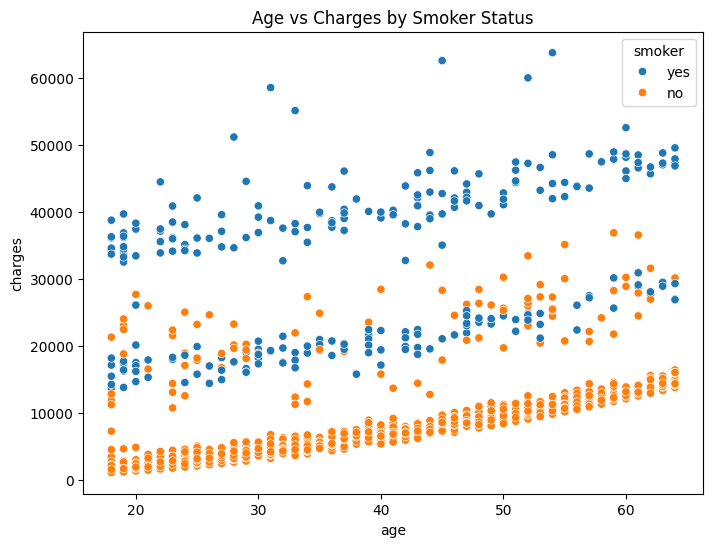

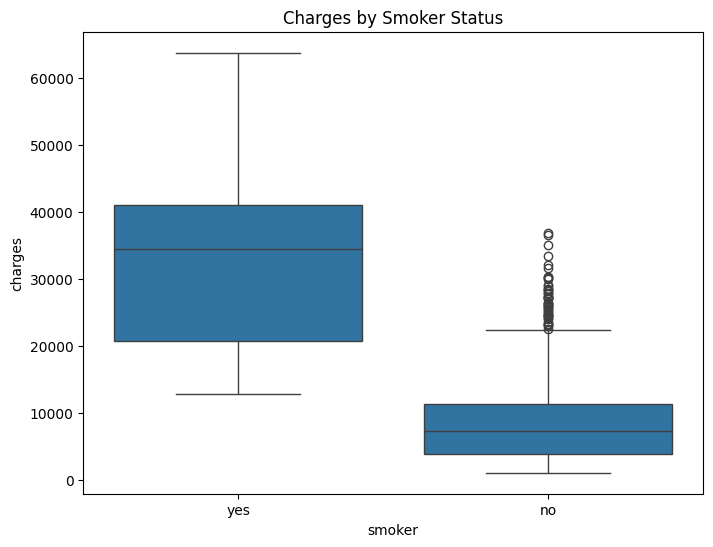

In [7]:
#2. Bivariate Analysis
# Scatter plot: age vs charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=data)
plt.title('Age vs Charges by Smoker Status')
plt.show()

# Box plot: smoker vs charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoker Status')
plt.show()

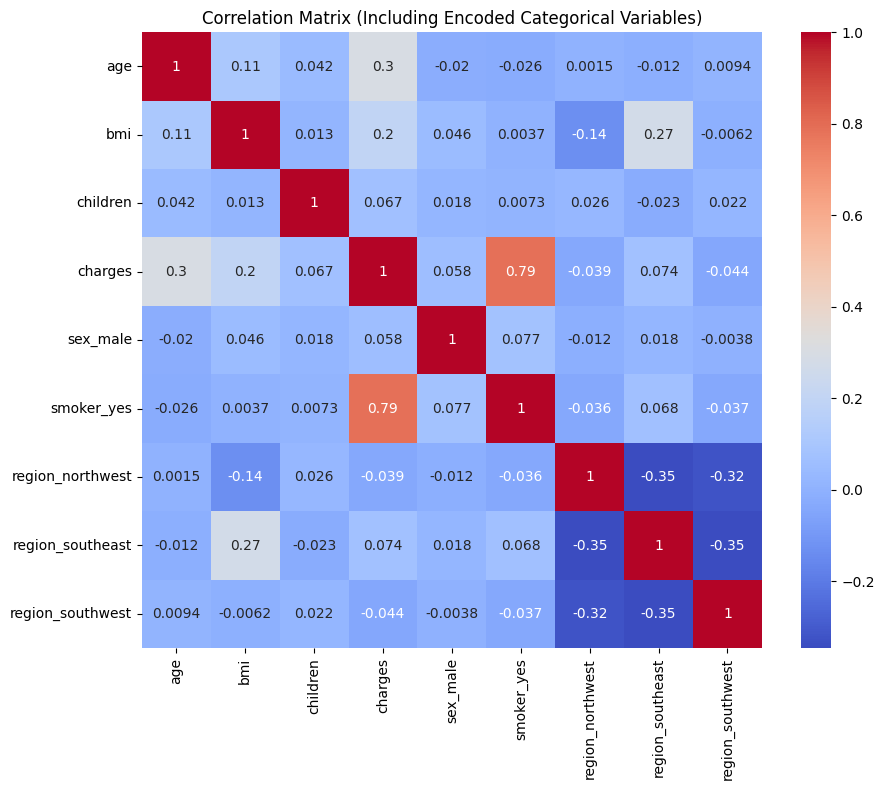

In [8]:
#3. Multivariate Analysis
# Perform one-hot encoding on categorical columns
encoded_data = pd.get_dummies(data, drop_first=True)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Including Encoded Categorical Variables)')
plt.show()

In [9]:
#Step 3: Preprocessing and Feature Engineering
#1. Encode Categorical Variables
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [10]:
#2. Scale Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['age', 'bmi', 'children']] = scaler.fit_transform(data[['age', 'bmi', 'children']])

In [11]:
#Step 4: Summary of Insights
#Key Findings :
#Smokers tend to have significantly higher medical charges.
#Age and BMI are positively correlated with charges.
#Region does not seem to have a strong impact on charges.
#Recommendations :
#Focus on smoker status and BMI as key predictors for modeling.
#Normalize numerical features before training models.